In [12]:
# Import data
import pandas as pd
import numpy

# Golang data
go_res_df1 = pd.read_csv('./golang/go-stats-conv-r1.csv')
go_res_df2 = pd.read_csv('./golang/go-stats-conv-r2.csv')
go_res_df3 = pd.read_csv('./golang/go-stats-conv-r3.csv')

go_comb = pd.concat([ go_res_df1,go_res_df2, go_res_df3])
#print(go_comb)

go_cpu_non_zero = go_comb.loc[go_comb["cpu"] > .1]

# Rust data
rust_res_df1 = pd.read_csv('./rust/rust-stats-conv-r1.csv')
rust_res_df2 = pd.read_csv('./rust/rust-stats-conv-r2.csv')
rust_res_df3 = pd.read_csv('./rust/rust-stats-conv-r3.csv')

rust_comb = pd.concat([rust_res_df1,rust_res_df2, rust_res_df3])
#print(rust_comb)

rust_cpu_non_zero = rust_comb.loc[rust_comb["cpu"] > .1]

# Python data
python_res_df1 = pd.read_csv('./python/python-stats-conv-r1.csv')
python_res_df2 = pd.read_csv('./python/python-stats-conv-r2.csv')
python_res_df3 = pd.read_csv('./python/python-stats-conv-r3.csv')

python_comb = pd.concat([python_res_df1,python_res_df2, python_res_df3])
print(python_comb)

python_cpu_non_zero = python_comb.loc[python_comb["cpu"] > .1]

# Node data
node_res_df1 = pd.read_csv('./js/node/node-stats-conv-r1.csv')
node_res_df2 = pd.read_csv('./js/node/node-stats-conv-r2.csv')
node_res_df3 = pd.read_csv('./js/node/node-stats-conv-r3.csv')

node_comb = pd.concat([node_res_df1,node_res_df2, node_res_df3])
print(node_comb)

node_cpu_non_zero = node_comb.loc[node_comb["cpu"] > .1]

# Bun data
bun_res_df1 = pd.read_csv('./js/bun/bun-stats-conv-r1.csv')
bun_res_df2 = pd.read_csv('./js/bun/bun-stats-conv-r2.csv')
bun_res_df3 = pd.read_csv('./js/bun/bun-stats-conv-r3.csv')

bun_comb = pd.concat([bun_res_df1,bun_res_df2, bun_res_df3])
print(bun_comb)

bun_cpu_non_zero = bun_comb.loc[bun_comb["cpu"] > .1]


                      name     cpu  memory
0    python-webserver-test  0.0013   131.8
1    python-webserver-test  0.0012   131.6
2    python-webserver-test  0.0004   131.6
3    python-webserver-test  0.0003   131.6
4    python-webserver-test  0.0004   131.6
..                     ...     ...     ...
132  python-webserver-test  2.1319   147.7
133  python-webserver-test  2.6599   147.5
134  python-webserver-test  2.1527   148.0
135  python-webserver-test  0.0002   147.0
136  python-webserver-test  0.0003   147.0

[428 rows x 3 columns]
                    name     cpu  memory
0    node-webserver-test  0.0000   80.19
1    node-webserver-test  0.0000   80.19
2    node-webserver-test  0.0000   80.19
3    node-webserver-test  0.8486  125.80
4    node-webserver-test  0.9560  123.40
..                   ...     ...     ...
136  node-webserver-test  1.1226  149.80
137  node-webserver-test  1.1164  150.00
138  node-webserver-test  0.0002  148.70
139  node-webserver-test  0.0000  148.40
140  node

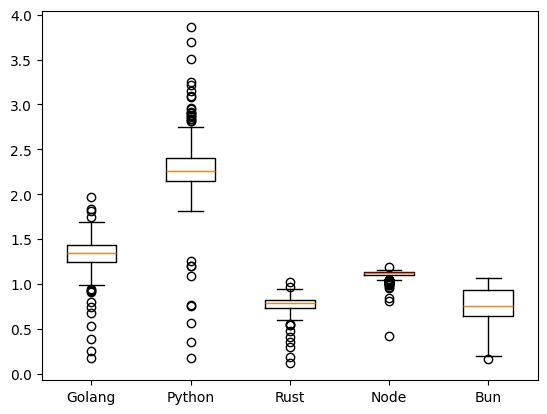

13.78


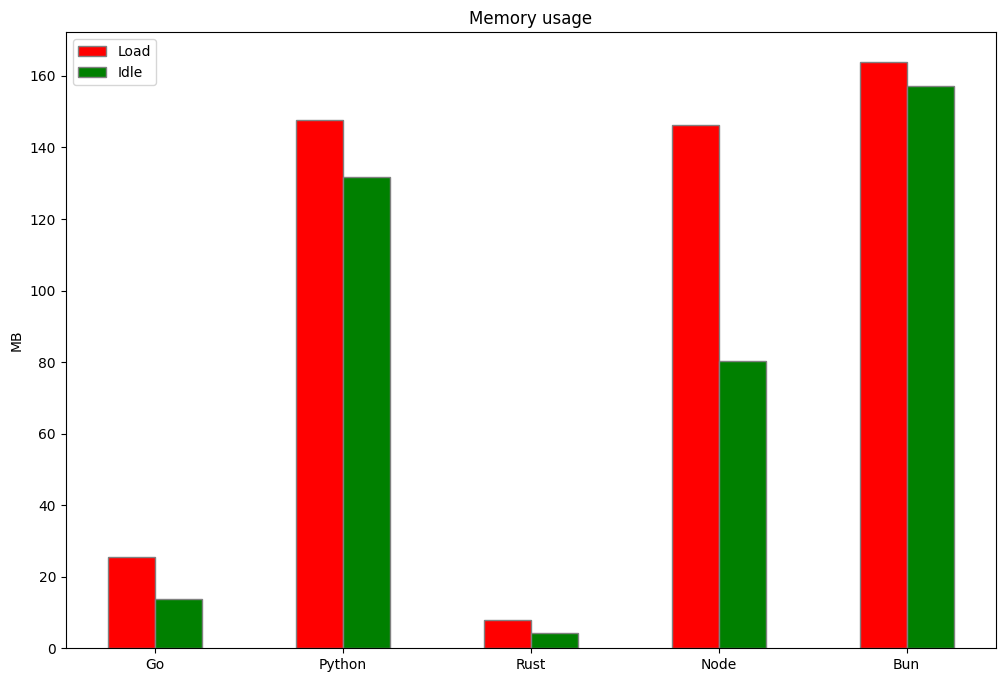

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot([go_cpu_non_zero['cpu'],python_cpu_non_zero['cpu'], rust_cpu_non_zero['cpu'], node_cpu_non_zero['cpu'], bun_cpu_non_zero['cpu']], tick_labels=["Golang", "Python", "Rust", "Node", "Bun"])
plt.savefig("./cpu_usage.svg")
plt.show()


#plt.boxplot([go_cpu_non_zero['memory'],python_cpu_non_zero['memory'], rust_cpu_non_zero['memory'], node_cpu_non_zero['memory'], bun_cpu_non_zero['memory']], tick_labels=["Golang", "Python", "Rust", "Node", "Bun"])


# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# set height of bar 
cpu_load = [go_cpu_non_zero['memory'].mean(), python_cpu_non_zero['memory'].mean(), rust_cpu_non_zero['memory'].mean(), node_cpu_non_zero['memory'].mean(), bun_cpu_non_zero['memory'].mean()] 
cpu_idle = [go_comb.iat[0, 2], python_comb.iat[0, 2],rust_comb.iat[0, 2], node_comb.iat[0, 2], bun_comb.iat[0, 2]]
print(go_comb.iat[0, 2]) 

# Set position of bar on X axis 
br1 = np.arange(len(cpu_load)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, cpu_load, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Load') 
plt.bar(br2, cpu_idle, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Idle') 

plt.xticks([r + barWidth / 2 for r in range(len(cpu_load))], 
        ['Go', 'Python', 'Rust', 'Node', 'Bun'])

#plt.bar(["Go"],[go_cpu_non_zero['memory'].mean()])
plt.legend()
plt.ylabel("MB")
plt.title("Memory usage")
plt.savefig("./mem_usage.svg")
plt.show()

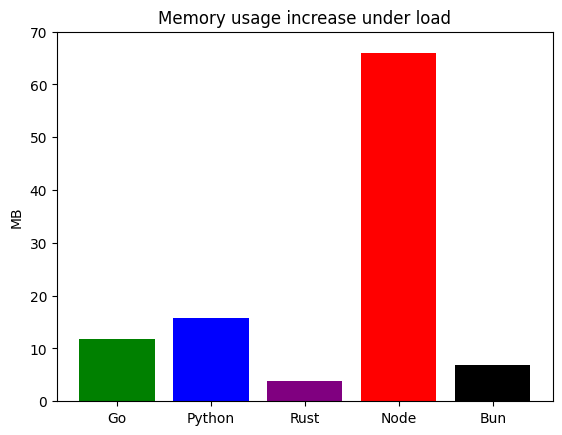

In [16]:
go_delta = go_cpu_non_zero['memory'].mean() - go_comb.iat[0, 2]
python_delta = python_cpu_non_zero['memory'].mean() - python_comb.iat[0, 2]
rust_delta = rust_cpu_non_zero['memory'].mean() - rust_comb.iat[0, 2]
node_delta = node_cpu_non_zero['memory'].mean() - node_comb.iat[0, 2]
bun_delta = bun_cpu_non_zero['memory'].mean() - bun_comb.iat[0, 2]

delta_res = [go_delta, python_delta, rust_delta, node_delta, bun_delta]

import matplotlib.pyplot as plt

plt.bar(['Go', 'Python', 'Rust', 'Node', 'Bun'], delta_res, color=['green', 'blue', 'purple', 'red', 'black'])
plt.ylabel("MB")
plt.title("Memory usage increase under load")
plt.ylim((0,70))
plt.savefig("./mem_usage_delta.svg")
plt.show()